In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl

In [138]:
df = pd.read_csv('data_D.csv')
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [140]:
df.shape

(41259, 15)

Drop kolom yang tidak akan digunakan. Unnamed = penanda nomor barisan. Id,customer id dan surname hanya identitas customer, tidak mengandung informasi yang penting.

In [141]:
df.drop(['Unnamed: 0','id','CustomerId','Surname'],axis = 1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


Check for NULL values

In [142]:
df.isnull().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Karena jumlah NULL values jauh sedikit dibanding keseluruhan data (8 vs 41k) maka dapat didrop.

In [143]:
df.dropna(inplace=True)

In [144]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41251 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41251 non-null  object 
 2   Gender           41251 non-null  object 
 3   Age              41251 non-null  float64
 4   Tenure           41251 non-null  int64  
 5   Balance          41251 non-null  float64
 6   NumOfProducts    41251 non-null  int64  
 7   HasCrCard        41251 non-null  int64  
 8   IsActiveMember   41251 non-null  int64  
 9   EstimatedSalary  41251 non-null  float64
 10  churn            41251 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.8+ MB


### Mengecek persebaran data

Secara keseluruhan:

In [145]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000
mean,656.278733,38.061211,4.999030,55723.301201,1.554362,0.754382,0.496667,112303.655728,0.211268
std,80.062353,8.801304,2.802899,62859.325180,0.545635,0.430458,0.499995,50369.838886,0.408213
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,710.000000,42.000000,7.000000,120165.450000,2.000000,1.000000,1.000000,154775.700000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Untuk kolom binary:

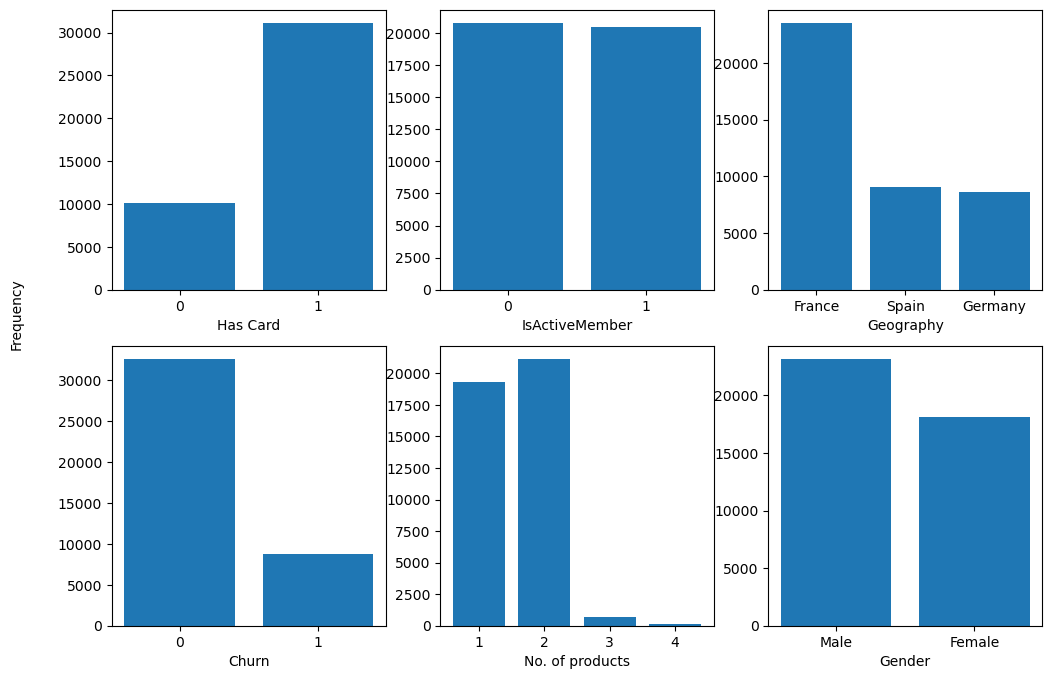

In [146]:
cc = df['HasCrCard'].value_counts()
act = df['IsActiveMember'].value_counts()
churn = df['churn'].value_counts()
product = df['NumOfProducts'].value_counts()
geo = df['Geography'].value_counts()
gender = df['Gender'].value_counts()

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0,0].bar(cc.index, cc.values)
ax[0,0].set_xlabel('Has Card')
ax[0,0].set_xticks(cc.index)

ax[0,1].bar(act.index, act.values)
ax[0,1].set_xlabel('IsActiveMember')
ax[0,1].set_xticks(act.index)

ax[0,2].bar(geo.index, geo.values)
ax[0,2].set_xlabel('Geography')
ax[0,2].set_xticks(geo.index)

ax[1,0].bar(churn.index, churn.values)
ax[1,0].set_xlabel('Churn')
ax[1,0].set_xticks(churn.index)

ax[1,1].bar(product.index,product.values)
ax[1,1].set_xlabel('No. of products')
ax[1,1].set_xticks(product.index)

ax[1,2].bar(gender.index,gender.values)
ax[1,2].set_xlabel('Gender')
ax[1,2].set_xticks(gender.index)

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()

Jumlah member yang aktif dan tidak aktif kurang lebih sama. Begitu pula untuk gender, yang wanita tidak selisih jauh dengan pria. Tetapi terdapat ketimpangan data pada Credit Card, Geography, churn, dan number of products. Jumlah pemilik kartu selisih 20k orang dengan yang tidak. Jumlah orang yang churn sekitar 20k orang lebih sedikit dibanding yang stay. Jumlah produk rata-rata berkisar 1-2 produk. 3-4 produk sangat sedikit.

### Checking for outliers

<Axes: >

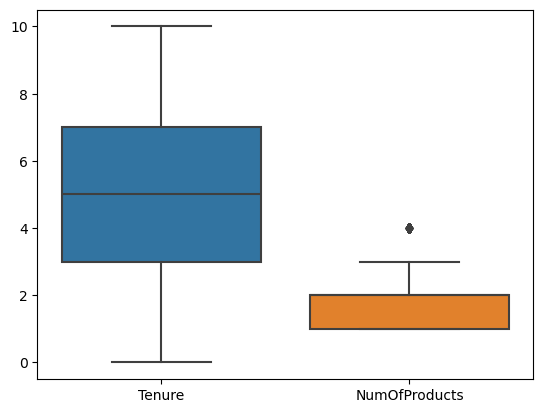

In [147]:
features = df[['Tenure','NumOfProducts']]
sns.boxplot(features)

In [148]:
print(len(df[df['NumOfProducts'] == 4]))

117


Outlier yang terdeteksi adalah number of products dengan jumlah 4. Tidak bisa kita buang.

In [149]:
features2 = df[['CreditScore','Age']]

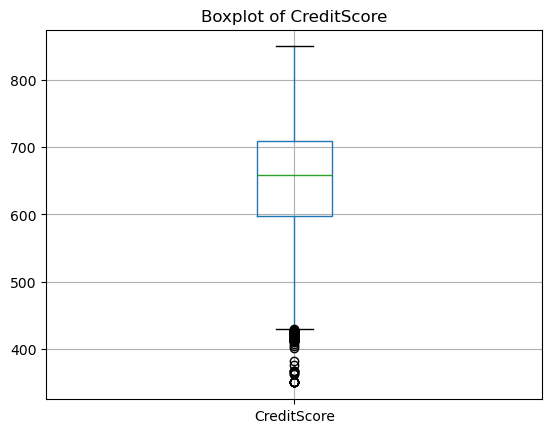

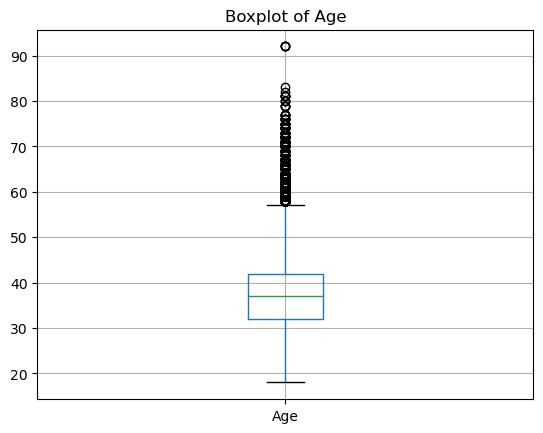

In [150]:
for column in features2:
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [151]:
print(len(df[df['Age'] >= 57]))
print(len(df[df['CreditScore'] <= 430]))

1803
82


Outlier yang terdeteksi untuk age dan creditscore sangatlah sedikit, dapat diabaikan.

<Axes: >

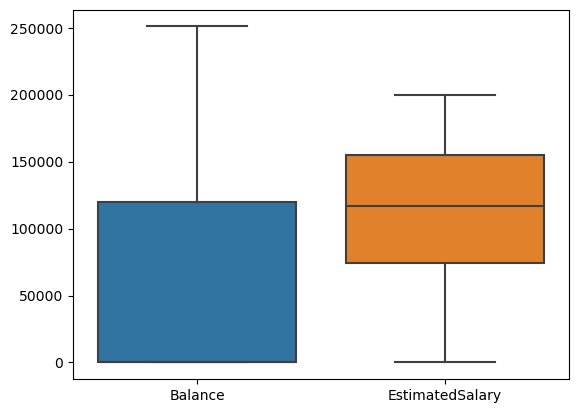

In [152]:
features3 = df[['Balance', 'EstimatedSalary']]
sns.boxplot(features3)

In [153]:
df['Geography'].value_counts()

Geography
France     23513
Spain       9080
Germany     8658
Name: count, dtype: int64

In [154]:
df['Gender'].value_counts()

Gender
Male      23163
Female    18088
Name: count, dtype: int64

Tidak terdapat outlier pada kedua kolom di atas.

In [155]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    21129
1    19311
3      694
4      117
Name: count, dtype: int64

### Checking for correlation

In [156]:
num = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]
small_num = df[['Geography','Gender','NumOfProducts','IsActiveMember','HasCrCard']]

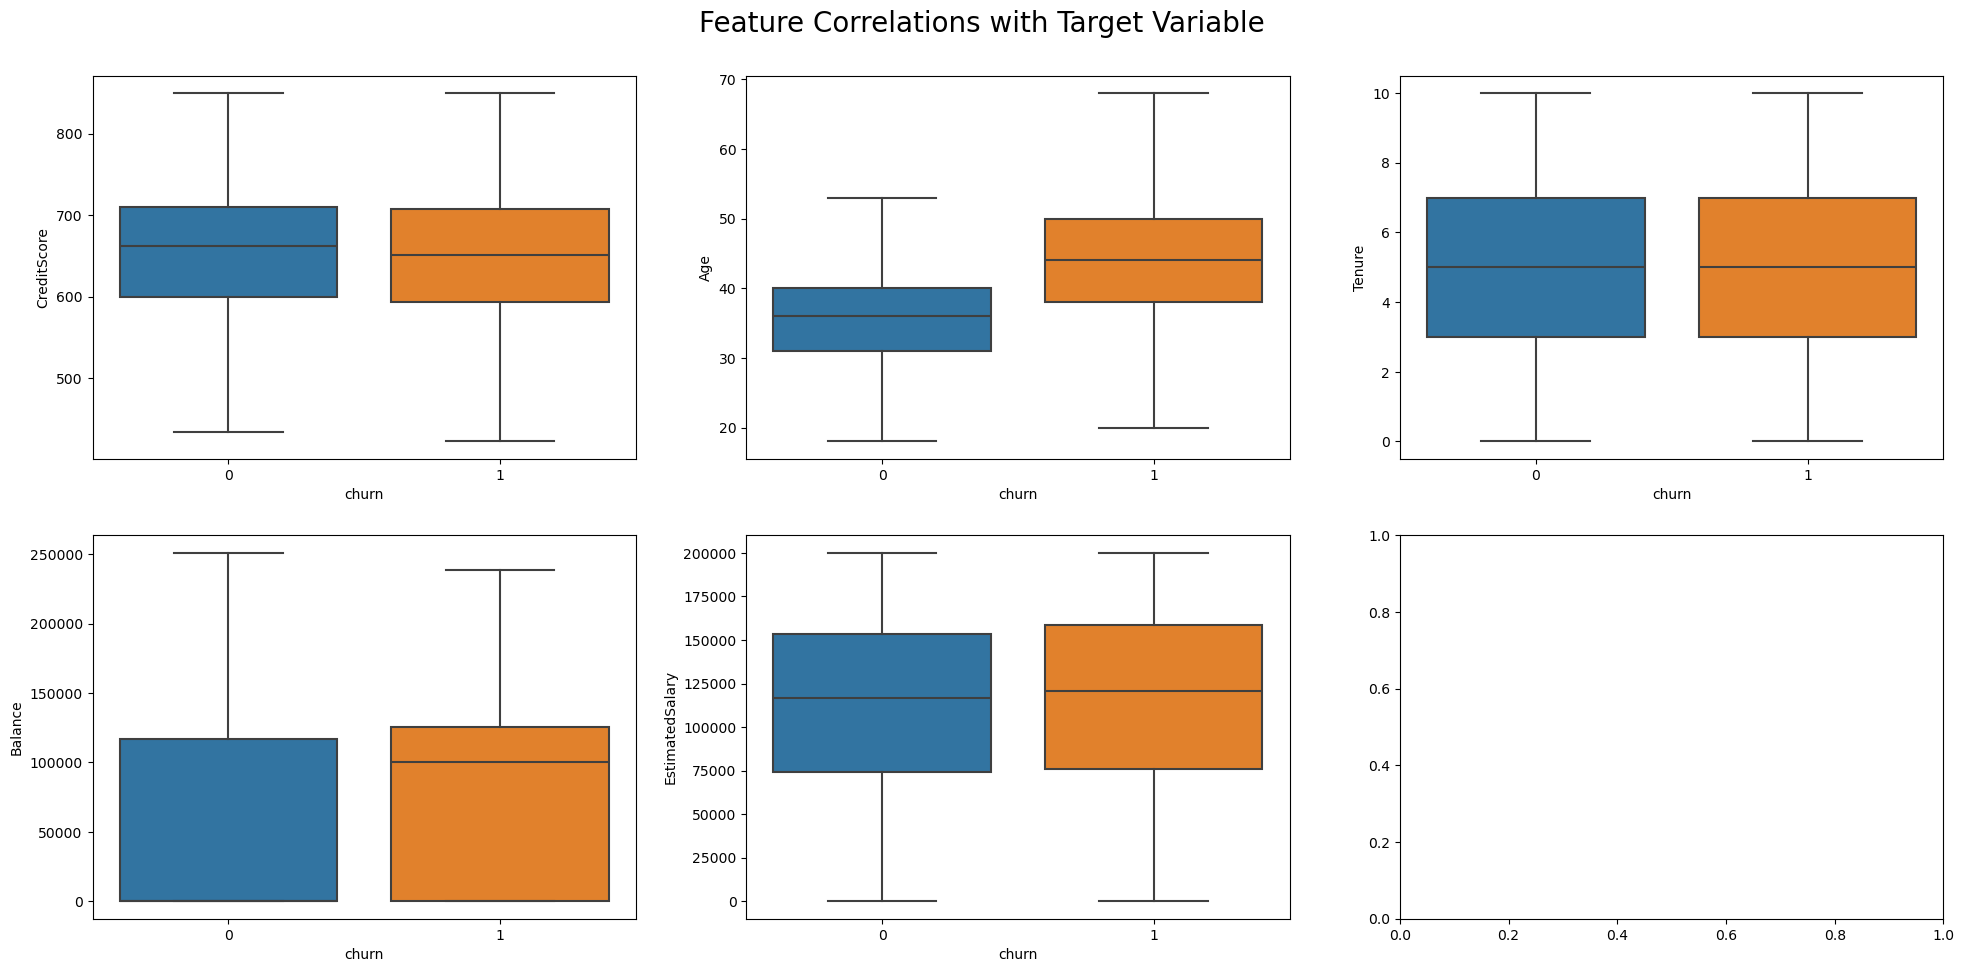

In [157]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

for feature, subplot in zip(num, ax.flatten()):
    if feature == 'churn':
        continue
    sns.boxplot(x = df['churn'], y = df[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['0', '1'])

plt.suptitle('Feature Correlations with Target Variable', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

Churn kerap terjadi pada orang dengan usia yang lebih tua.

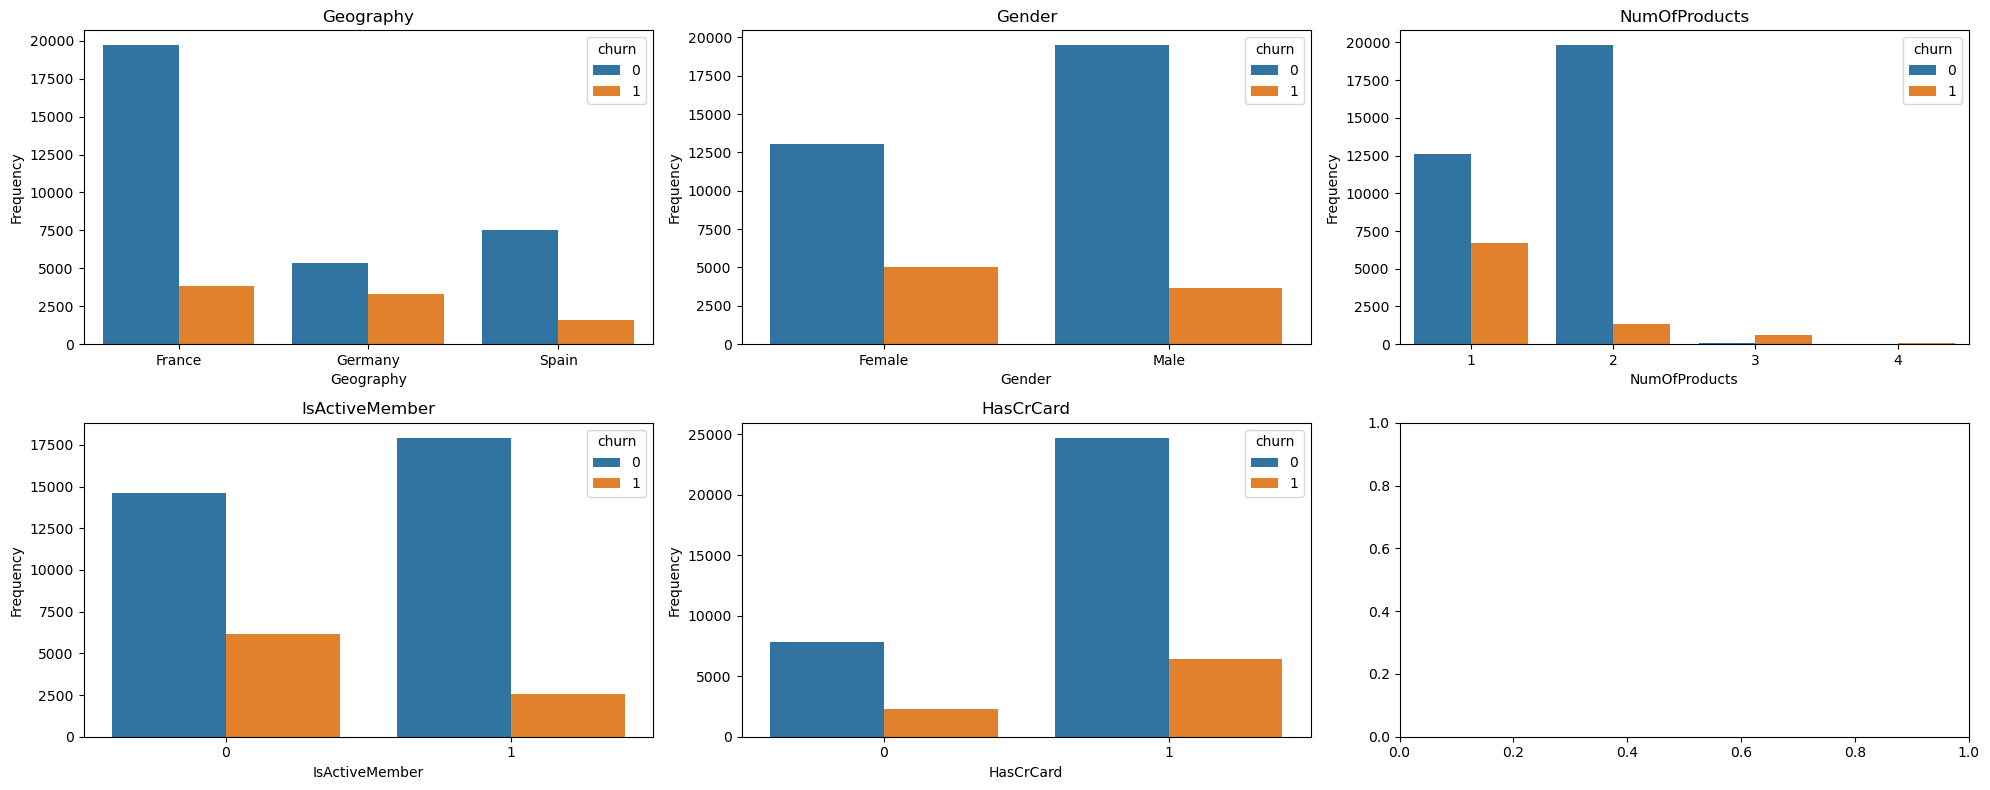

In [198]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))

for col, subplot in zip(small_num, ax.flatten()):
    sns.countplot(x=col, hue=df['churn'].astype(str), data=df, ax=subplot)
    subplot.set_title(f"{col}")
    subplot.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Churn lebih tinggi ketika:
- Customer adalah wanita
- Number of products = 1
- Customer bukan active member
- Customer memiliki kartu kredit

In [159]:
num_only = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts','IsActiveMember','HasCrCard','churn']]

<Axes: >

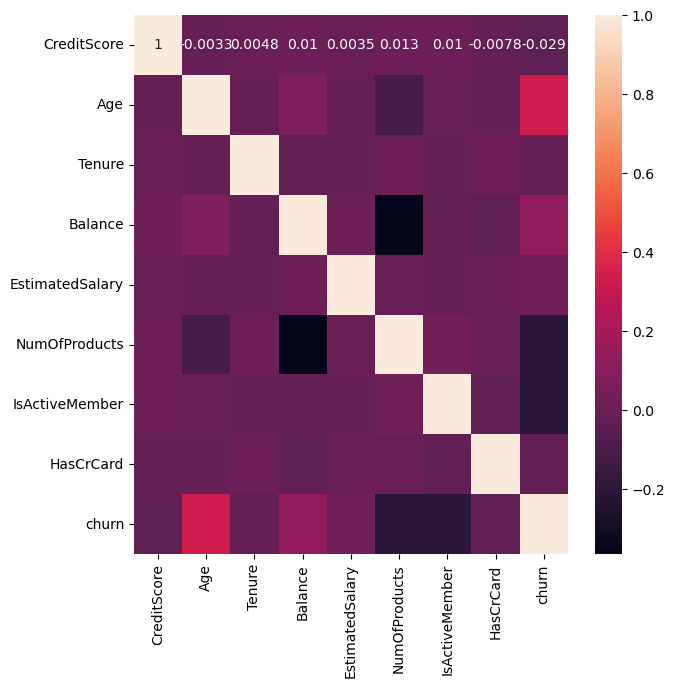

In [160]:
corr = num_only.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

Pada heatmap semakin terang warnanya maka korelasinya semakin tinggi. Terlihat bahwa churn memiliki korelasi dengan 'Age' dan 'Balance'. Meski 'NumOfProducts' dan 'IsActiveMember' tidak memiliki korelasi yang baik dengan churn, saya tidak akan drop.

## Splitting Data

In [161]:
input_df = df.drop(['churn'], axis=1)
output_df = df['churn']

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

### Encoding

Binary encoding cukup karena valuesnya hanya male/female.

In [163]:
# Binary Encoding
to_enc = {"Gender": {"Male":1,"Female" :0}}
x_train = x_train.replace(to_enc)
x_test = x_test.replace(to_enc)

In [164]:
filename = 'gender_encode.pkl'
pkl.dump(to_enc, open(filename, 'wb'))

Geography terdiri dari 3 negara dan tidak ada tingkatan tertentu (bukan ordinal) sehingga tidak bisa dimap manual.

In [165]:
# OneHot Encoding
from sklearn.preprocessing import OneHotEncoder

subs_enc_train=x_train[['Geography']]
subs_enc_test=x_test[['Geography']]

encoder=OneHotEncoder()

subs_enc_train=pd.DataFrame(encoder.fit_transform(subs_enc_train).toarray(),columns=encoder.get_feature_names_out())
subs_enc_test=pd.DataFrame(encoder.transform(subs_enc_test).toarray(),columns=encoder.get_feature_names_out())

x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,subs_enc_train], axis=1)
x_test_enc=pd.concat([x_test,subs_enc_test], axis=1)

In [166]:
encoder.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [167]:
filename_subs = 'oneHot_encode.pkl'
pkl.dump(encoder, open(filename_subs, 'wb'))

In [168]:
print(x_train_enc.shape)
print(x_test_enc.shape)

(33000, 14)
(8251, 14)


In [169]:
x_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              33000 non-null  int64  
 1   CreditScore        33000 non-null  float64
 2   Geography          33000 non-null  object 
 3   Gender             33000 non-null  int64  
 4   Age                33000 non-null  float64
 5   Tenure             33000 non-null  int64  
 6   Balance            33000 non-null  float64
 7   NumOfProducts      33000 non-null  int64  
 8   HasCrCard          33000 non-null  int64  
 9   IsActiveMember     33000 non-null  int64  
 10  EstimatedSalary    33000 non-null  float64
 11  Geography_France   33000 non-null  float64
 12  Geography_Germany  33000 non-null  float64
 13  Geography_Spain    33000 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 3.5+ MB


Drop kolom yang tidak diperlukan

In [170]:
x_train_enc=x_train_enc.drop(['index','Geography'],axis=1)
x_test_enc=x_test_enc.drop(['index','Geography'],axis=1)

In [171]:
x_train_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,691.0,1,43.0,2,0.00,2,1,1,131284.92,1.0,0.0,0.0
1,750.0,0,55.0,7,133871.19,1,1,0,53949.71,0.0,1.0,0.0
2,709.0,0,52.0,7,161889.79,1,0,1,18761.92,1.0,0.0,0.0
3,749.0,1,38.0,7,0.00,2,1,1,149474.69,1.0,0.0,0.0
4,512.0,0,42.0,6,117436.36,1,1,0,155047.73,1.0,0.0,0.0


In [172]:
x_test_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,599.0,0,56.0,6,102773.20,1,1,1,37266.43,0.0,1.0,0.0
1,828.0,0,36.0,1,122793.96,2,1,0,99341.87,0.0,0.0,1.0
2,684.0,1,26.0,5,87098.91,1,0,0,106095.82,0.0,1.0,0.0
3,520.0,0,28.0,1,121197.64,1,1,1,72577.33,1.0,0.0,0.0
4,637.0,1,37.0,7,126477.43,1,0,0,70954.87,0.0,1.0,0.0


### Scaling

Karena range data yang besar, terutama untuk balance dan estimatedsalary, dilakukan normalisasi

In [173]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()

to_scale = ['CreditScore', 'Balance', 'EstimatedSalary']

for col in to_scale:
  x_train_enc[col] = scaler.fit_transform(x_train_enc[col].values.reshape(-1, 1))
  x_test_enc[col] = scaler.transform(x_test_enc[col].values.reshape(-1, 1))

In [174]:
filename_scaler = 'scaler.pkl'
pkl.dump(scaler, open(filename_scaler, 'wb'))

In [175]:
x_train_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.682,1,43.0,2,0.000000,2,1,1,0.656429,1.0,0.0,0.0
1,0.800,0,55.0,7,0.533568,1,1,0,0.269716,0.0,1.0,0.0
2,0.718,0,52.0,7,0.645241,1,0,1,0.093761,1.0,0.0,0.0
3,0.798,1,38.0,7,0.000000,2,1,1,0.747387,1.0,0.0,0.0
4,0.324,0,42.0,6,0.468064,1,1,0,0.775255,1.0,0.0,0.0


In [176]:
x_test_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.498,0,56.0,6,0.409621,1,1,1,0.186292,0.0,1.0,0.0
1,0.956,0,36.0,1,0.489418,2,1,0,0.496699,0.0,0.0,1.0
2,0.668,1,26.0,5,0.347149,1,0,0,0.530472,0.0,1.0,0.0
3,0.340,0,28.0,1,0.483055,1,1,1,0.362863,1.0,0.0,0.0
4,0.574,1,37.0,7,0.504099,1,0,0,0.354750,0.0,1.0,0.0


# Models

## Random Forest

Define random parameters for random forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [178]:
y_predict = RF_class.predict(x_test_enc)

In [179]:
y_test.value_counts()

churn
0    6519
1    1732
Name: count, dtype: int64

In [180]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6519
           1       0.80      0.33      0.47      1732

    accuracy                           0.84      8251
   macro avg       0.82      0.65      0.69      8251
weighted avg       0.84      0.84      0.81      8251



Hasil prediksi sangat baik, tetapi model masih kurang bisa mengidentifikasi class '1' (recall rendah).

### Tuning using GridSearchCV

Dicari parameter yang dapat menghasilkan akurasi paling tinggi

In [181]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':[100,200],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[6,8,10,12], 
}

In [182]:
RF2 = RandomForestClassifier()
RF2 = GridSearchCV(RF2,param_grid = parameters,scoring='accuracy',cv=5)  

In [183]:
RF2.fit(x_train_enc,y_train)
print("Tuned Hyperparameters :", RF2.best_params_)
print("Accuracy :",RF2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Accuracy : 0.8620909090909091


Parameter yang didapat, dimasukkan lagi ke dalam model baru

In [194]:
RF_best = RandomForestClassifier(criterion= 'gini',max_depth=10,n_estimators=200)
RF_best.fit(x_train_enc,y_train)
ypred_best=RF_best.predict(x_test_enc)

In [195]:
print('\nClassification Report\n')
print(classification_report(y_test, ypred_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6519
           1       0.75      0.51      0.61      1732

    accuracy                           0.86      8251
   macro avg       0.82      0.73      0.76      8251
weighted avg       0.85      0.86      0.85      8251



Model ini menunjukkan peningkatan atas kemampuan mengidentifikasi class '1'.

## XGB Classifier

Train XGB Classifier tanpa parameter

In [186]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_enc,y_train)
xgb_pred = xgb.predict(x_test_enc)

In [187]:
print('\nClassification Report\n')
print(classification_report(y_test, xgb_pred, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6519
           1       0.70      0.55      0.62      1732

    accuracy                           0.86      8251
   macro avg       0.80      0.74      0.77      8251
weighted avg       0.85      0.86      0.85      8251



Tune menggunakan gridsearchCV

In [188]:
param2 = {
    'n_estimators': [100, 200],  
    'max_depth': [6, 8, 10, 12],           
    'learning_rate': [0.1, 0.01, 0.001]
}

In [189]:
xgb2 = XGBClassifier()
xgb2 = GridSearchCV(xgb2,param_grid = param2,scoring='accuracy',cv=5)  

In [190]:
xgb2.fit(x_train_enc,y_train)
print("Tuned Hyperparameters :", xgb2.best_params_)
print("Accuracy :",xgb2.best_score_)

Tuned Hyperparameters : {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Accuracy : 0.8611818181818182


In [191]:
xgb_best = XGBClassifier(learning_rate = 0.01,max_depth=6,n_estimators=200)
xgb_best.fit(x_train_enc,y_train)
xgbpred_best=xgb_best.predict(x_test_enc)

In [192]:
print('\nClassification Report\n')
print(classification_report(y_test, xgbpred_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6519
           1       0.76      0.50      0.60      1732

    accuracy                           0.86      8251
   macro avg       0.82      0.73      0.76      8251
weighted avg       0.85      0.86      0.85      8251



Hasil dari base xgb model dengan hasil tuning kurang lebih sama, ada value yang naik dan ada yang turun.

## Perbandingan hasil model:

Random Forest:

<img src="RF_best.png" alt="RF" width="600"/>

XGB Classifier:

<img src="xgb_best.png" alt="RF" width="600"/>

Karena kedua model menghasilkan performance yang sangat mirip, untuk kasus ini kedua model sama bagusnya. Tetapi saya akan mengambil model dengan f1-score yang lebih tinggi, yaitu Random Forest Classifier.

## Penyimpanan dalam pickle

In [196]:
filename = 'RandomForest.pkl'
pkl.dump(RF_best, open(filename, 'wb'))